### Linear Regression Lines

Explore linear regression models with `different` slopes (parameter 'a').  
Let's `pretend` that intercept is known b = -18    

$ f(x) = ax -18 $  

Slope range: 
 [-2.         -1.45833333 -0.91666667 -0.375       0.16666667  0.70833333
  1.25        1.79166667  2.33333333  2.875       3.41666667  3.95833333
  4.5       ]


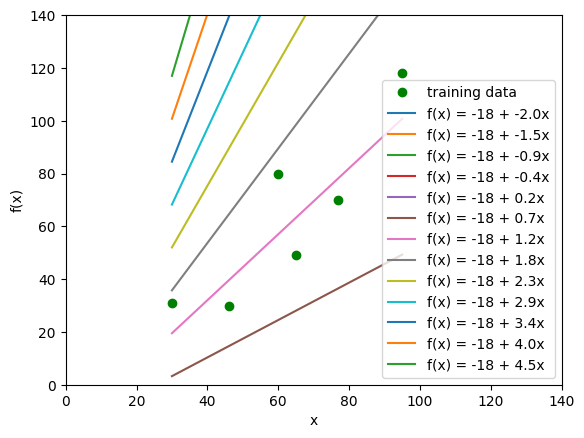

In [29]:
""" Linear Regression lines with know intercept parameter (b = -18)
"""

import numpy as np
import matplotlib.pyplot as plt

# Training Dataset
X = np.array([30, 46, 60, 65, 77, 95]).reshape(6,1)
Y = np.array([31, 30, 80, 49, 70, 118])

# Define a range of slope values (parameter 'a') to explore
A = np.linspace(-2, 4.5, 13) # 13 values

# Output results
print("Slope range: \n", A)

# Create a plot for the training data and various linear regression lines
fig, ax = plt.subplots()
plt.ylim(0, 140)
plt.xlim(0, 140)

# Plot training data points
ax.plot(X, Y, 'o', color='g', label='training data') 

for i in range(len(A)):
    msg ='f(x) = -18 + %sx' % A[i].round(1)

    # Plot linear regression lines
    ax.plot(X, -18 + A[i]*X, label = msg) 

plt.xlabel("x")
plt.ylabel("f(x)")  
plt.legend()
plt.show()


### Cost function J(a)

The `cost function` is named SSR(a) or J(a), the sum of squared residuals.  

$ J(a) =  \sum_{i=1}^{n} (R^2) $

SSR(a -18): 
 [282654.0, 197923.0, 128329.0, 73872.0, 34552.0, 10368.0, 1320.0, 7409.0, 28635.0, 64998.0, 116497.0, 183133.0, 264906.0]


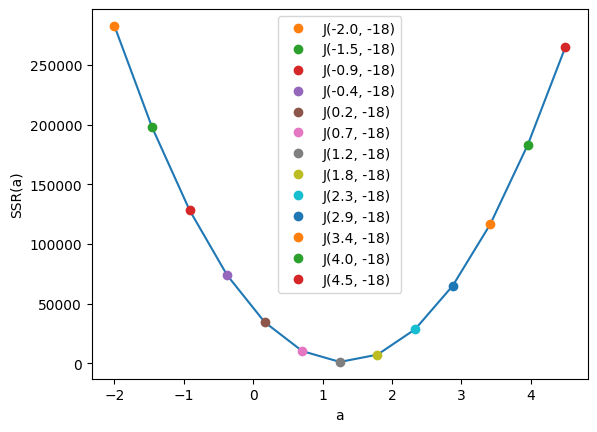

In [30]:
""" Cost function J(a) visualization
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Training Dataset
X = np.array([30, 46, 60, 65, 77, 95]).reshape(6,1)
Y = np.array([31, 30, 80, 49, 70, 118])

# # Define a range of slope values (parameter 'a') to explore
A = np.linspace(-2, 4.5, 13) # 13 values

# Initialize a list to store the Sum of Squared Residuals (SSR) for each 'a'
SSR = []

# Loop through each 'a' value and calculate SSR
for a in A:
    P = []  # predictions
    SR = [] # square residuals
    for i in X:
        P.append(-18 + a*i)
    for i in range(0, len(X)):
        SR.append((Y[i] - P[i])**2)
    SSR.append(np.sum(SR).round())

# Output results
print("SSR(a -18): \n", SSR)

# Define a generic cost function SSR(a) = J
def J(a, b=-18):
    J = 0
    for i in range(len(X)): # number of train points
        J += (Y[i] - (a*X[i] + b))**2
    return J

# Create a plot of the cost function J(a, -18) for different 'a' values
fig, ax = plt.subplots()
ax.plot(A, J(A)) # J(a)
for a in A:
    msg ='J(%.1f, -18)' % a
    ax.plot(a, J(a), 'o', label = msg) # Plot points on the cost function curve
plt.xlabel("a")
plt.ylabel("SSR(a)")  
plt.legend()
plt.show()


### Cost function J(a, b)

We can visualize the cost function J(a,b) for `different` b parameter.  
The result is a `3D` surface.  

$ J(a, b) =  \sum_{i=1}^{n} (R^2) $

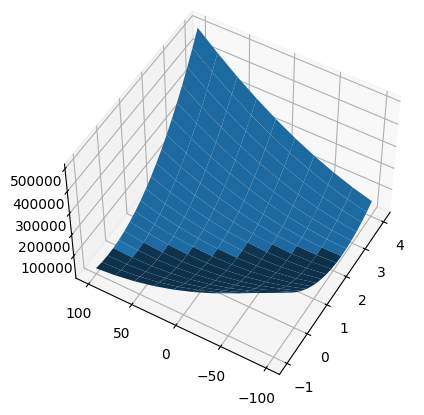

In [26]:
""" Cost function J(a,b) visualization
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Training Dataset
X = np.array([30, 46, 60, 65, 77, 95]).reshape(6,1)
Y = np.array([31, 30, 80, 49, 70, 118])

# Define a generic cost function SSR(a,b) = J
def J(a, b=-18):
    J = 0
    for i in range(len(X)): # number of train points
        J += (Y[i] - (a*X[i] + b))**2
    return J

# Create a 3D plot of the cost function J(a, b)
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
a = np.linspace(-1, 4, 20)
b = np.linspace(-100, 100, 10)
aa, bb = np.meshgrid(a, b)
ax.plot_surface(aa, bb, J(aa, bb)) # Plot the 3D surface of the cost function
ax.view_init(50,-150) # Set the view angle
plt.show()
